# **1. Import Modules**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# **2. Import Data**

In [2]:
#import dataset
df = pd.read_csv('Data/data.csv', encoding='windows-1252')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# **3. Data Preprocessing**

In [3]:
#convert date column to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df[df['Quantity'] == -80995].index

Int64Index([540422], dtype='int64')

In [7]:
#Option 1
df_op1 = df.drop(df[df['Quantity'] == -80995].index)

In [8]:
#Option 2
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

In [9]:
#Revenue column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3


# **4. Data Visualization**

**Matplotlib**

- 

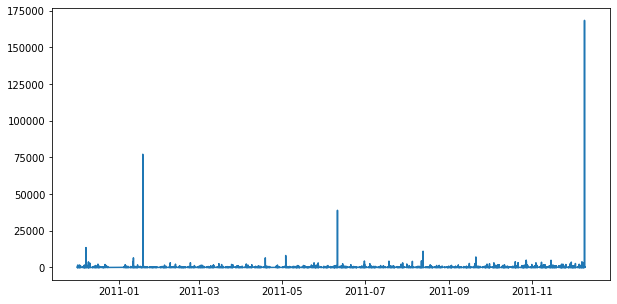

In [10]:
plt.figure(figsize=(10, 5))

#plt.plot(x, y)
plt.plot(df['InvoiceDate'], df['Revenue'])

* Van de: bieu thi theo tung gio, tung ngay nen khong tim duoc insight. Can phai group theo tung ngay

In [11]:
df['date'] = df['InvoiceDate'].dt.date
df['hour'] = df['InvoiceDate'].dt.hour

df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,date,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010-12-01,8


In [12]:
df_revenue = df.groupby('date')['Revenue'].sum()
df_revenue 

date
2010-12-01     58960.79
2010-12-02     47748.38
2010-12-03     46943.71
2010-12-05     31774.95
2010-12-06     54830.46
                ...    
2011-12-05     88741.96
2011-12-06     56713.21
2011-12-07     75439.16
2011-12-08     82495.00
2011-12-09    200920.60
Name: Revenue, Length: 305, dtype: float64

In [13]:
df_revenue = pd.DataFrame(df_revenue).reset_index()
df_revenue

,date,Revenue
0,2010-12-01,58960.79
1,2010-12-02,47748.38
2,2010-12-03,46943.71
3,2010-12-05,31774.95
4,2010-12-06,54830.46
...,...,...
300,2011-12-05,88741.96
301,2011-12-06,56713.21
302,2011-12-07,75439.16
303,2011-12-08,82495.00


Text(0.5, 1.0, 'Total Revenue by Date')

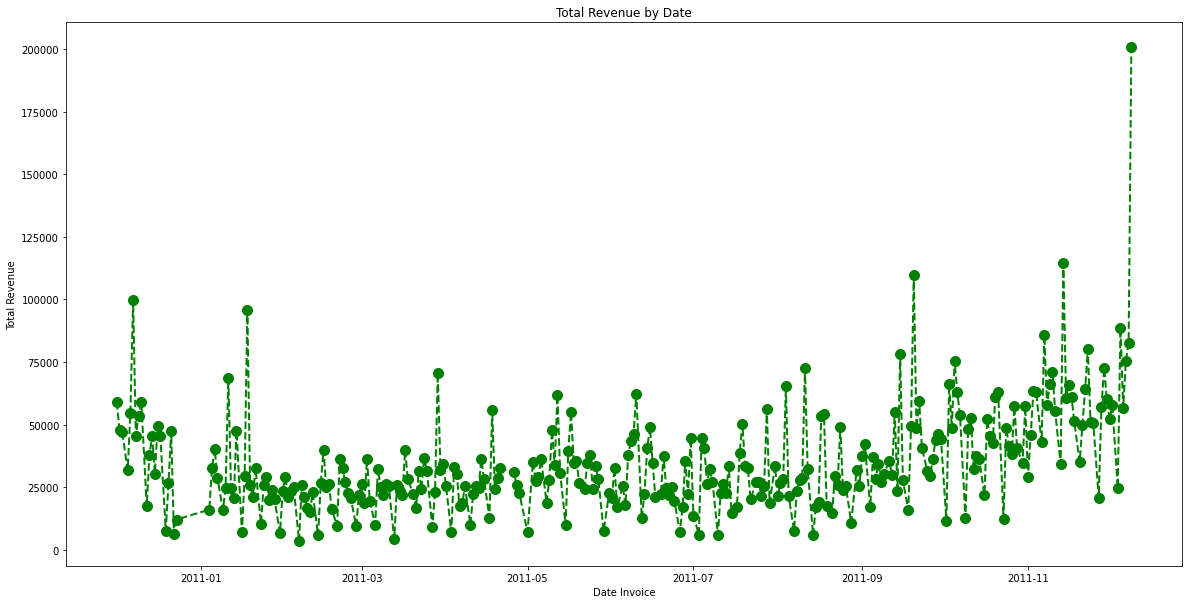

In [14]:
plt.figure(figsize=(20, 10))
plt.plot(df_revenue['date'], df_revenue['Revenue'], c='green', marker='o', linestyle='--', linewidth=2, markersize=10)

plt.xlabel('Date Invoice')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Date')

In [15]:
df['Month'] = df['InvoiceDate'].dt.year.astype(str) + " - " + df['InvoiceDate'].dt.month.astype(str)
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,date,hour,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010-12-01,8,2010 - 12


In [16]:
df_revenue = df.groupby('Month')['Revenue'].sum().reset_index()
df_revenue

,Month,Revenue
0,2010 - 12,823746.140
1,2011 - 1,691364.560
2,2011 - 10,1154979.300
3,2011 - 11,1509496.330
4,2011 - 12,638792.680
5,2011 - 2,523631.890
6,2011 - 3,717639.360
7,2011 - 4,537808.621
8,2011 - 5,770536.020
9,2011 - 6,761739.900


Text(0.5, 1.0, 'Total Revenue by Month')

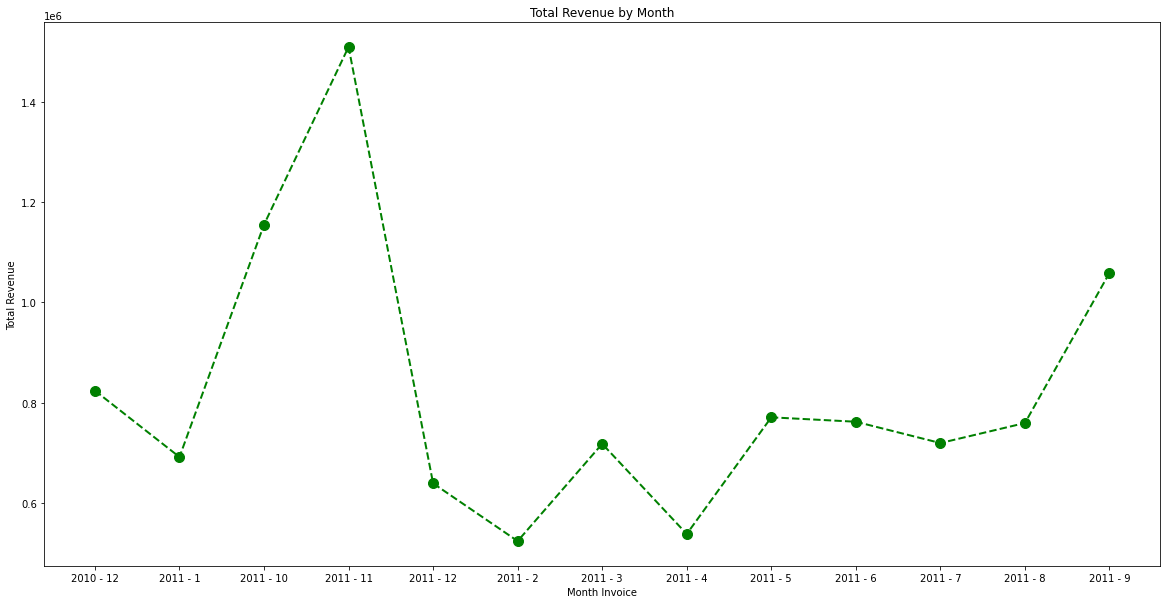

In [17]:
plt.figure(figsize=(20, 10))
plt.plot(df_revenue['Month'], df_revenue['Revenue'], c='green', marker='o', linestyle='--', linewidth=2, markersize=10)

plt.xlabel('Month Invoice')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Month')

In [18]:
#Oriented Object
fig, ax = plt.subplots(figuresize=(20, 10))
ax.plot(df_revenue['Month'], df_revenue['Revenue'], c='green', marker='o', linestyle='--', linewidth=2, markersize=10)

AttributeError: 'Figure' object has no property 'figuresize'

## **4.2. Scatter Chart**

In [19]:
df = pd.read_csv('Data/data.csv', encoding='windows-1252')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['date'] = df['InvoiceDate'].dt.date
df['hour'] = df['InvoiceDate'].dt.hour
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df=df[df['Quantity'] > 0]
df=df[df['UnitPrice'] > 0]

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,8,20.34


<module 'matplotlib.pyplot' from 'C:\\Users\\Admin\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

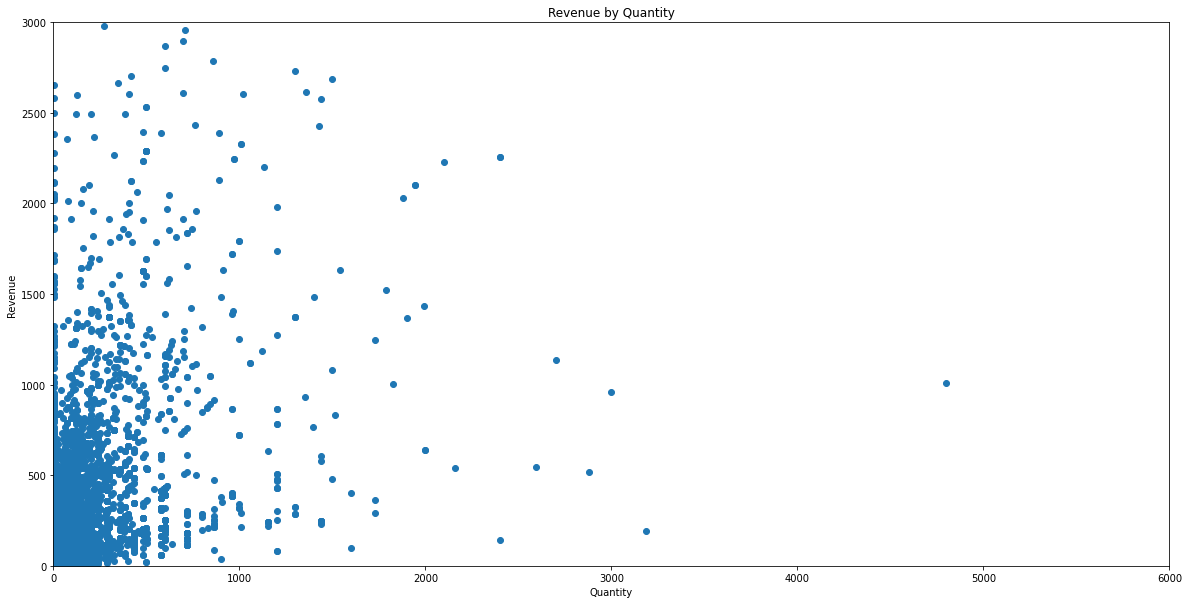

In [66]:
plt.figure(figsize=(20, 10))
plt.scatter(df['Quantity'], df['Revenue'])
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.title('Revenue by Quantity')

#Giới hạn trục x, y
plt.xlim(0, 6000)
plt.ylim(0, 3000)
plt

## **4.3. Bar chart**

In [21]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
 8   date         530104 non-null  object        
 9   hour         530104 non-null  int64         
 10  Revenue      530104 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 48.5+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,hour,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,8,20.34


In [34]:
df_country = df.groupby('Country')['Revenue'].sum().reset_index()
df_country['Revenue'] /= 100
df_country.info()
df_country

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  38 non-null     object 
 1   Revenue  38 non-null     float64
dtypes: float64(1), object(1)
memory usage: 736.0+ bytes


,Country,Revenue
0,Australia,1385.21310
1,Austria,101.98680
2,Bahrain,7.54140
3,Belgium,411.96340
4,Brazil,11.43600
5,Canada,36.66380
6,Channel Islands,204.50440
7,Cyprus,135.90380
8,Czech Republic,8.26740
9,Denmark,189.55340


In [35]:
df_country_top5 = df_country.sort_values(by='Revenue', ascending=False).head(5)
df_country_top5

,Country,Revenue
36,United Kingdom,90252.22084
24,Netherlands,2854.46340
10,EIRE,2834.53960
14,Germany,2288.67140
13,France,2097.15110


Text(0.5, 1.0, 'Revenue by Country')

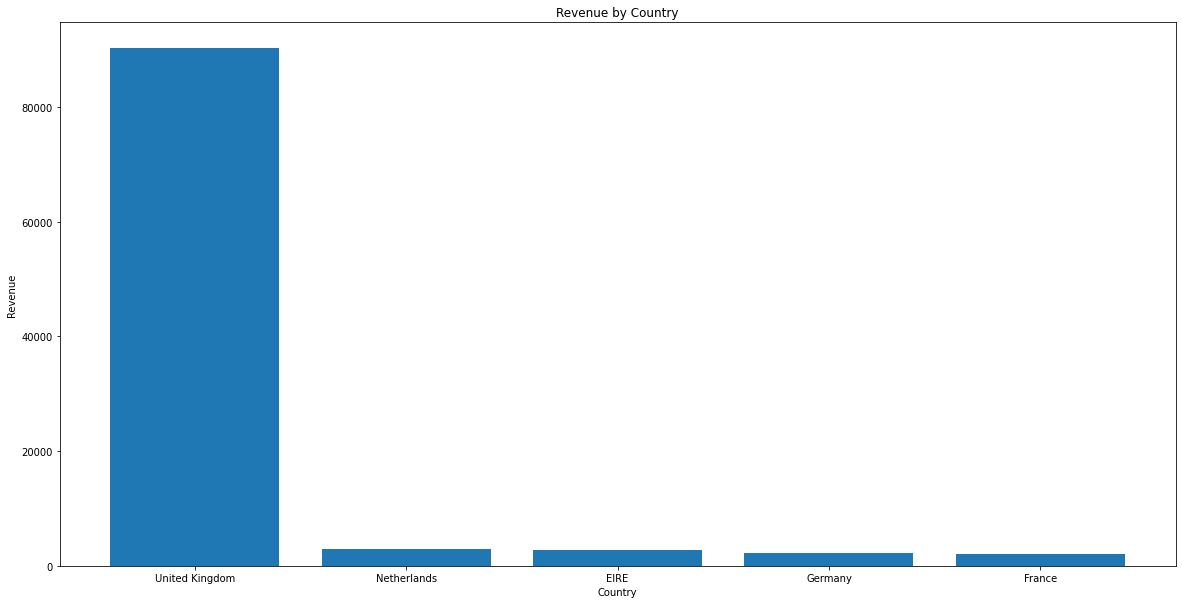

In [38]:
plt.figure(figsize=(20, 10))
plt.bar(df_country_top5['Country'], df_country_top5['Revenue'])
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.title('Revenue by Country')

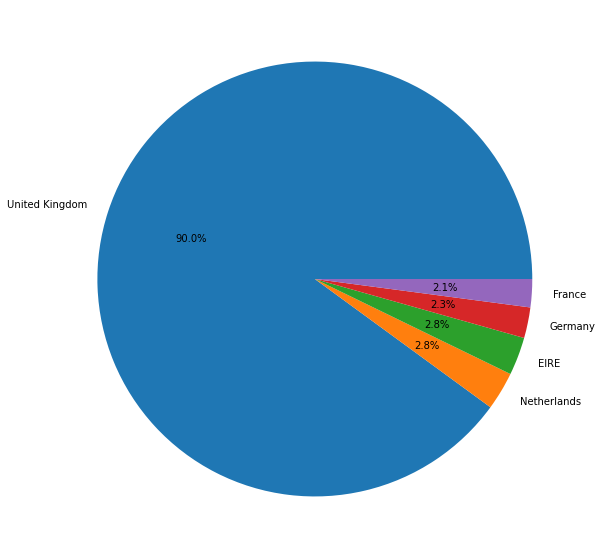

In [43]:
plt.figure(figsize=(20, 10))
plt.pie(df_country_top5['Revenue'], 
        labels=df_country_top5['Country'], 
        autopct='%.1f%%')
plt.show()

# **Manage code**

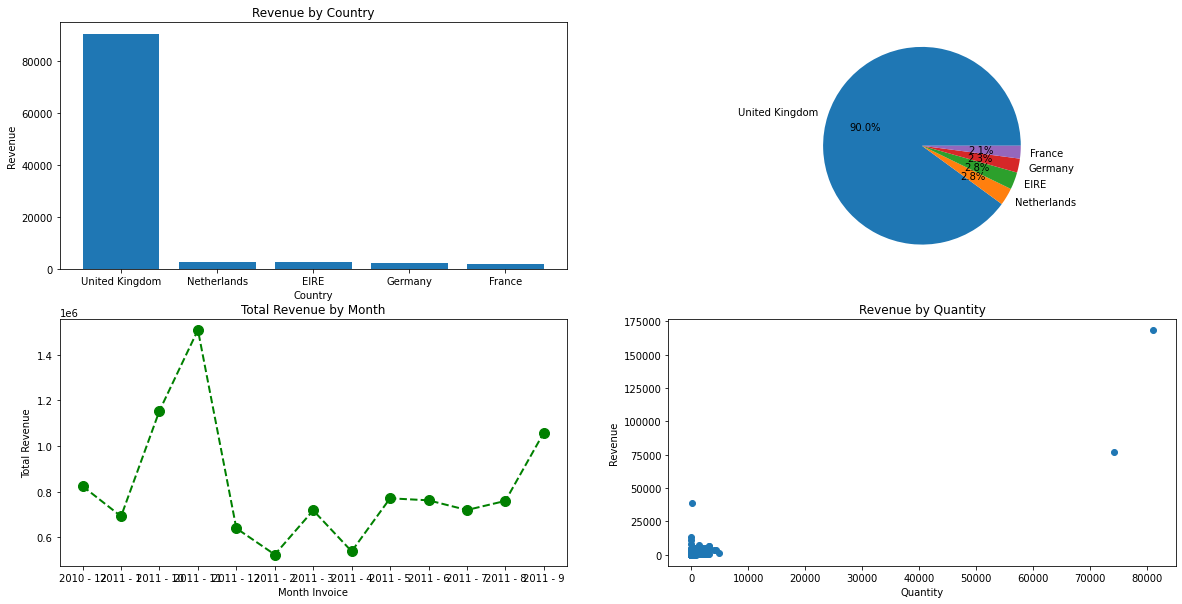

In [45]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
ax[0,0].bar(df_country_top5['Country'], df_country_top5['Revenue'])
ax[0,0].set(xlabel='Country', ylabel='Revenue', title='Revenue by Country')

ax[0,1].pie(df_country_top5['Revenue'], 
            labels=df_country_top5['Country'], 
            autopct='%.1f%%')

ax[1,0].plot(df_revenue['Month'], df_revenue['Revenue'], c='green', marker='o', linestyle='--', linewidth=2, markersize=10)
ax[1,0].set(xlabel='Month Invoice', ylabel='Total Revenue', title='Total Revenue by Month')

ax[1,1].scatter(df['Quantity'], df['Revenue'])
ax[1,1].set(xlabel='Quantity', ylabel='Revenue', title='Revenue by Quantity')

plt.show()

# **5. Seaborn**

## **Histogram**

In [46]:
import seaborn as sns

In [47]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [49]:
df_titanic = sns.load_dataset('titanic')
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<AxesSubplot:xlabel='age', ylabel='Count'>

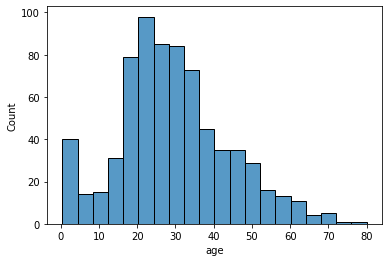

In [54]:
sns.histplot(df_titanic['age'], bins=20)

<AxesSubplot:xlabel='age', ylabel='Density'>

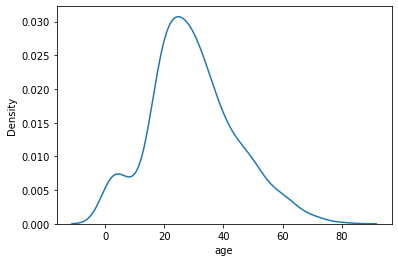

In [56]:
sns.kdeplot(data=df_titanic['age'])

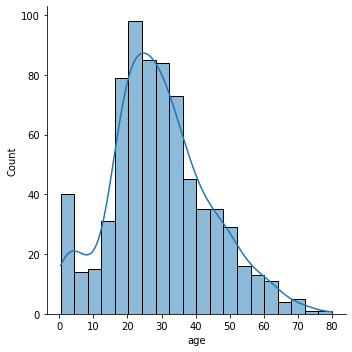

In [57]:
sns.displot(df_titanic['age'], kde=True)

In [59]:
df_titanic['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='sex'>

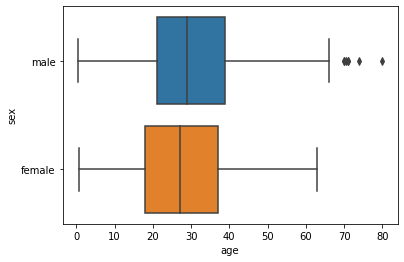

In [62]:
sns.boxplot(x=df_titanic['age'], y=df_titanic['sex'])

<AxesSubplot:xlabel='age', ylabel='sex'>

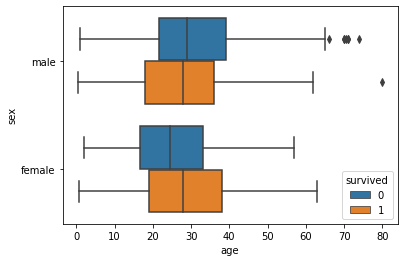

In [65]:
sns.boxplot(x=df_titanic['age'], y=df_titanic['sex'], hue=df_titanic['survived'])

In [67]:
df_titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:>

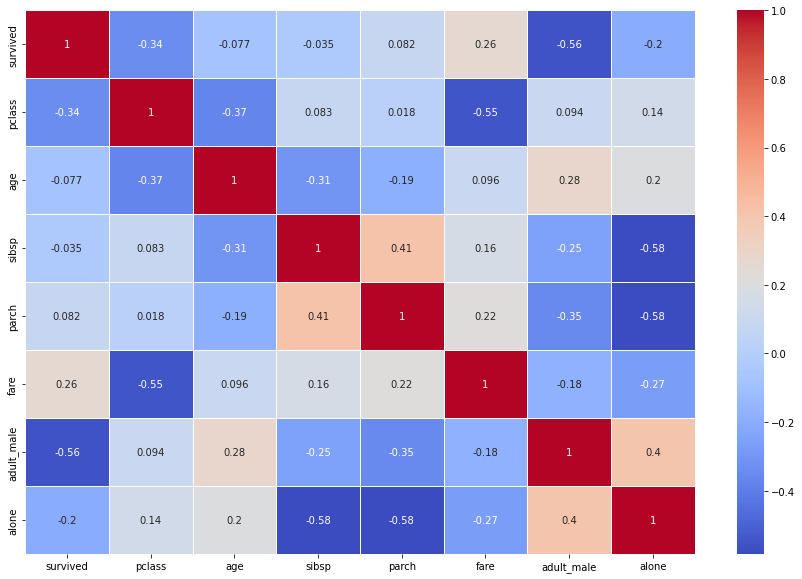

In [76]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_titanic.corr(), annot=True, cmap='coolwarm', linewidths=0.5)